In [1]:
using Revise
using Plots
using Test
import Random
using BenchmarkTools

In [2]:
using Cluster

[ Info: Precompiling Cluster [top-level]


### Generate a Cluster Problem
- Create 20 distinct points: 10 in $R^2$ and 10 in $R^5$.
- Added noise about these points.

In [3]:
Random.seed!(1)
M1 = [-1,-2] .+ rand(2, 100)
M2 = 3.0 .* [1,2] .+ rand(2, 100)
M3 = 6.0 .* [2,1] .+ rand(2, 100)
M4 = 9.0 .* [1,1] .+ rand(2, 100)
M44 = copy(M4)
M5 = 12.0 .* [-1, 1] .+ rand(2, 100)
M6 = 15.0 .* [0.5, 3.0] .+ rand(2, 100)
M7 = 18.0 .+ [-2.4, 1.0] .+ rand(2, 100)
M8 = 21.0 .+ [0.3, -0.3] .* rand(2, 100)
M9 = 24.0 .+ rand(2, 100)
M10 = 27.0 .+ rand(2, 100)

M = hcat(M1, M2, M3, M4, M5, M6, M7, M8, M9, M10)

2×1000 Matrix{Float64}:
 -0.950828  -0.606729  -0.308143  …  27.1424  27.3743  27.1601  27.6261
 -1.88092   -1.97591   -1.23248      27.8408  27.3209  27.8683  27.8839

In [4]:
Random.seed!(1)
M51 = [-1,-2, 1, 2, 0] .+ rand(5, 100)
M52 = 3.0 .* [1,1,3,4,5] .+ rand(5, 100)
M53 = 6.0 .* [2,1, 1, 2, 1] .+ rand(5, 100)
M54 = 9.0 .* [1,1, 0, 1, 2] .+ rand(5, 100)
M55 = 12.0 .* [-1, 1, -1, 2, 1] .+ rand(5, 100)
M56 = 15.0 .* [0.5, 3.0, 0, 1, 2] .+ rand(5, 100)
M57 = 18.0 .+ [-2.4, 1.0, -1, 2, 3] .+ rand(5, 100)
M58 = 21.0 .+ [0.3, -0.3, 0.5, 0.5, 0.8] .* rand(5, 100)
M59 = 24.0 .+ rand(5, 100)
M510 = 27.0 .+ rand(5, 100)

MM5 = hcat(M51, M52, M53, M54, M55, M56, M57, M58, M59, M510)

5×1000 Matrix{Float64}:
 -0.950828  -0.232482  -0.861773  …  27.5967  27.2035  27.1432  27.5468
 -1.88092   -1.91275   -1.65226      27.3843  27.131   27.5443  27.1603
  1.39327    1.85572    1.19852      27.0718  27.0804  27.4099  27.5686
  2.02409    2.84038    2.0082       27.8735  27.8051  27.2198  27.0336
  0.691857   0.89077    0.592041     27.5188  27.3091  27.6806  27.6737

### Find the best Clusters
- Find best info for a range of cluster numbers.
    - `ds` : The Total Variation for the cluster.                    Int -> Float
    - `mp` : Map of the Index of a point to the index of a Centroid. Int -> (Int -> Int) 
    - `xc` : The map of Centroid Indices to Centroids.               Int -> (2xn)Matrix{Float}
    - `sd` : The list of unused Centroid Indices.                    Int -> Vector{Int}

### Plot the Result

In [5]:
@time kbest, mp, xc, tv = find_best_cluster(M4, 1:15, verbose=true, num_trials=300, N=1000, threshold=1.0e-2, seed=123)

var_by_k     = [38.78507215070972, 27.418223681008993, 22.69326994348095, 21.689500046843392, 19.52829292205718, 16.0106893034732, 16.45594538065546, 14.047967018671295, 14.433984082625157, 14.675518124435767, 13.589022890336455, 13.776686072152245, 13.315895334605838, 12.942112591590442, 11.281574477166481]
var_by_k_mod = [38.78507215070972, 38.77522378586209, 39.30589653198471, 43.379000093686784, 52.39990854989743, 39.218019223745955, 49.75810178934455, 44.70035733354349, 48.11328027541719, 60.3304820511892, 57.361423884286936, 59.654800592235496, 59.09063804016376, 58.801726431381084, 52.432020082877315]
rel change of var [-0.0002539860221574133, 0.013501097620068027, 0.09389574570426441, 0.1721550419810476, -0.3361181820771313, 0.21182646014554563, -0.11314774103619289, 0.07093515391877132, 0.20250462718673393, -0.05176053810818287, 0.03844412662821071, -0.009547410059919739, -0.004913318474072747, -0.1214850455587142]
mono_var_by_mod: [38.78507215070972, 38.77522378586209, 38.775

(1, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [9.479449965138636; 9.509921208077595;;], 38.78507215070972)

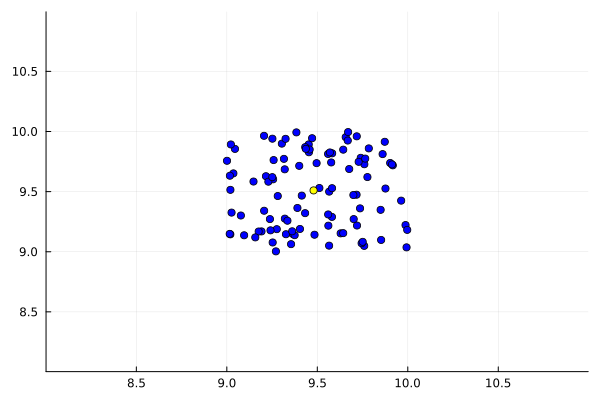

In [6]:
x = xc[1, :]
y = xc[2, :]

xp = M4[1, :]
yp = M4[2, :];

xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color="blue", legend=:none, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow")

In [7]:
@time kbest, mp, xc, tv = find_best_cluster(M, 1:15, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [15598.750755325047, 9297.292428057775, 7359.815971565828, 5894.628617189538, 3914.1615254354692, 2351.4029236327447, 2879.3443280618258, 1191.2291681525735, 1182.1936155766505, 350.15757352935907, 350.15757352935907, 547.1717169214442, 343.73142616134214, 341.31647848136015, 337.5874423124702]
var_by_k_mod = [15598.750755325047, 13148.35704510799, 12747.575197108912, 11789.257234379076, 8752.331245787982, 5759.737342588785, 7618.029030975968, 3369.3048909915797, 3940.645385255501, 1107.2954723106589, 1266.9177697070902, 2211.368166402818, 1430.0091715535575, 1550.7513207097606, 1568.9646503579452]
rel change of var [-0.18636501137066064, -0.03143984968137106, -0.08128739102708274, -0.34698480933895187, -0.5195712452148274, 0.24393339547947507, -1.2610091034931534, 0.14498652845081544, -2.5588020395606996, 0.1259926265248737, 0.4270887186696025, -0.54640138706271, 0.07786042000656873, 0.01160850223364135]
mono_var_by_mod: [15598.750755325047, 13148.35704510799, 12747.575

(10, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [-0.4647786335684582 3.4934544090790887 … 24.49422035218324 27.447603324472404; -1.5175945768316743 6.503798597479442 … 24.483990255724194 27.488695232426544], 350.15757352935907)

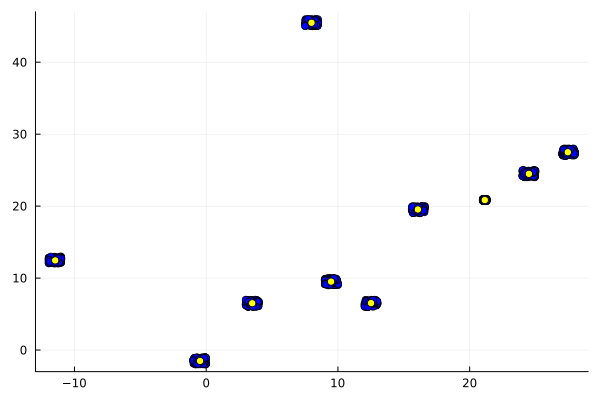

In [8]:
x = xc[1, :]
y = xc[2, :]

xp = M[1, :]
yp = M[2, :];

xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color="blue", legend=:none, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow")

### Higher Dimensional, but Similar Example
Same as previous example, but now in 5 dimensions.

We can't easily examine a 5 dimensional space, so take two of the 5 coordinates: 1 and 4 
and examine the project onto this 2 dimensional plane.

In [9]:
@time kbest, mp, xc, tv = find_best_cluster(MM5, 1:15, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [22566.419998693054, 14262.344230234014, 11530.079322392075, 10473.372919200776, 9336.888726339295, 3884.4112072104354, 6893.724235307348, 2378.0539973064906, 2474.065728903609, 603.3143109502887, 603.3143109502887, 734.9497475443321, 603.3143109502887, 599.0277823415605, 597.556320055998]
var_by_k_mod = [22566.419998693054, 16383.131355671267, 14363.376548124928, 13819.698419360024, 12882.382321493149, 5558.472335816873, 10173.57320990051, 3604.455839773722, 4265.964389971938, 956.1887443394801, 1063.1896130474338, 1308.7479081399872, 1240.2491211249749, 1233.0862580797104, 1232.4756336776736]
rel change of var [-0.37741799835361445, -0.14061838459634393, -0.039340809927028916, -0.07275953115465633, -1.3176120241677796, 0.4536361786429578, -1.8224990573165631, 0.15506658980868035, -3.4614250222311473, 0.10064137891759098, 0.18762841458256438, -0.055229861362756004, -0.0058088904959651255, -0.0004954454151882362]
mono_var_by_mod: [22566.419998693054, 16383.131355671267, 

(10, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [-0.4938543125551282 3.482123394295134 … 24.474405270017655 27.512366679671167; -1.521500849377153 3.5516987515692837 … 24.45675978597688 27.436079813990062; … ; 2.506567988412762 12.533228341186843 … 24.495800407873947 27.49139873531594; 0.5351446252807343 15.491312243736655 … 24.45419821002447 27.431775587415704], 603.3143109502887)

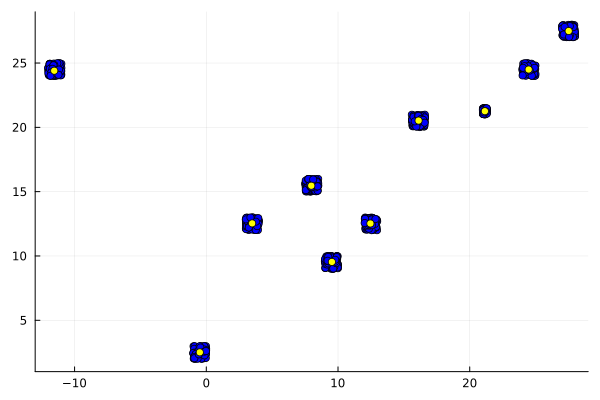

In [10]:

x = xc[1, :]
y = xc[4, :]

xp = MM5[1, :]
yp = MM5[4, :];

xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color="blue", legend=:none, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow")

In [11]:
savefig(g,"synth_data_set_test.svg")

"/home/rsm/proj/github/Cluster.jl/src/synth_data_set_test.svg"

### Another Similar Test in 4 Dimensions

In [12]:
Random.seed!(1)
M1 = [-1,-2,1, 1] .+ rand(4, 100)
M2 = 3.0 .* [1,2, -1, 2] .+ rand(4, 100)
M3 = 6.0 .* [2,1, 0, 3] .+ rand(4, 100)
M4 = 9.0 .* [1,1, -2, 0] .+ rand(4, 100)
M5 = 12.0 .* [-1, 1, 2, 2] .+ rand(4, 100)
M6 = 15.0 .* [0.5, 3.0, 2, -2] .+ rand(4, 100)
M7 = 18.0 .+ [-2.4, 1.0, 2, 0] .+ rand(4, 100)
M8 = 21.0 .+ [0.3, -0.3, 1, -1] .* rand(4, 100)
M9 = 24.0 .+ rand(4, 100)
M10 = 27.0 .+ rand(4, 100)

M = hcat(M1, M2, M3, M4, M5, M6, M7, M8, M9, M10)

4×1000 Matrix{Float64}:
 -0.950828  -0.308143  -0.159616  …  27.0147  27.9526  27.586   27.3153
 -1.88092   -1.23248   -1.10923      27.0683  27.0746  27.6242  27.042
  1.39327    1.08725    1.13823      27.8622  27.1865  27.7115  27.2123
  1.02409    1.85572    1.34774      27.5175  27.3522  27.1277  27.1553

In [13]:
kbest, mp, xc, tv = find_best_cluster(M, 1:15, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [26105.259967181486, 18539.186370766292, 13762.751548480317, 9107.841928856604, 8295.86156133947, 4980.746337893871, 9607.690198933951, 2445.9454984552335, 3500.2258037544157, 540.071416288594, 540.071416288594, 706.8460115276677, 540.071416288594, 532.989502974615, 536.6756790193942]
var_by_k_mod = [26105.259967181486, 22046.93233847675, 18112.79965967662, 12880.43357973934, 12405.20647492895, 7795.2892906941925, 17860.164216730856, 4113.573603113931, 6736.187700073619, 960.3978795365665, 1072.9708531648055, 1534.8534435840345, 1262.1578157008012, 1251.9055087721956, 1337.8181112974037]
rel change of var [-0.18407674892810655, -0.21720179943018078, -0.4062259276867579, -0.03830868158227186, -0.591372175210733, 0.5635376474650886, -3.3417636196447056, 0.3893320990641377, -6.013955198780865, 0.10491708446338202, 0.30092944205844663, -0.21605509587707275, -0.008189361622556068, 0.06421844778427375]
mono_var_by_mod: [26105.259967181486, 22046.93233847675, 18112.79965967662,

(10, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [-0.4638613889337658 3.5158791577745627 … 24.52495440036195 27.475304728976617; -1.510189133119629 6.481867685295993 … 24.534671687480134 27.477645148329938; 1.5456574467128612 -2.451298977472739 … 24.478388500859637 27.462638597448805; 1.5005472893395762 6.462830546367099 … 24.458094669646908 27.493419893662846], 540.071416288594)

In [14]:
kbest

10

## Apply find_best_cluster to Iris DataSet
We will also use a number of different distance metrics.

In [15]:
import RDatasets

In [16]:
iris = RDatasets.dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [17]:
MI = permutedims(Matrix(iris[:, [:SepalWidth, :SepalLength]]), (2,1))


2×150 Matrix{Float64}:
 3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4  …  3.2  3.3  3.0  2.5  3.0  3.4  3.0
 5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0     6.8  6.7  6.7  6.3  6.5  6.2  5.9

In [58]:
kbest, mp, xc, tv = find_best_cluster(MI, 1:7; dmetric=L2, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [125.43893314488339, 82.38156517719699, 62.80790381460394, 57.34695729179415, 54.504123463290064, 49.702508916777326, 47.98895815903961]
var_by_k_mod = [125.43893314488339, 116.50512676311507, 108.78648052379312, 114.6939145835883, 121.87492511795786, 121.7457857822355, 126.96684896590284]
rel change of var [-0.07668165882462022, -0.07095225621931744, 0.0515060810439936, 0.05892114827901925, -0.0010607294116393164, 0.041121467738948654]
mono_var_by_mod: [125.43893314488339, 116.50512676311507, 108.78648052379312, 108.78648052379312, 108.78648052379312, 108.78648052379312, 108.78648052379312]
mono_var_series: [-0.03834082941231011, -0.03547612810965872, 0.0, 0.0, 0.0, 0.0]


(3, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 2, 3, 3, 3, 2, 3, 3, 2], [3.409803921568628 2.6999999999999997 3.0782608695652165; 5.003921568627451 5.800000000000001 6.823913043478258], 62.80790381460394)

In [ ]:
xc

In [57]:
tv

62.69987288875754

In [20]:
cmap = find_cluster_map(Symbol.(iris[:, :Species]), mp)

Dict{Int64, Symbol} with 3 entries:
  2 => :versicolor
  3 => :virginica
  1 => :setosa

In [21]:
Cluster.predict(permutedims(Matrix(iris[:, [:SepalWidth, :SepalLength]])), xc, cmap)

150-element Vector{Symbol}:
 :setosa
 :setosa
 :setosa
 :setosa
 :setosa
 :setosa
 :setosa
 :setosa
 :setosa
 :setosa
 :setosa
 :setosa
 :setosa
 ⋮
 :versicolor
 :virginica
 :virginica
 :virginica
 :versicolor
 :virginica
 :virginica
 :virginica
 :versicolor
 :virginica
 :virginica
 :versicolor

In [22]:
iris[:, [:SepalWidth, :SepalLength]];

In [23]:
x = xc[1, :]
y = xc[2, :];

In [24]:
xr,yr,mat = raw_confusion_matrix(mp, Symbol.(iris[:, :Species]))

([1, 2, 3], [:setosa, :versicolor, :virginica], [50 0 1; 0 38 15; 0 12 34])

In [25]:
argmax(mat, dims=1)[1,:]

3-element Vector{CartesianIndex{2}}:
 CartesianIndex(1, 1)
 CartesianIndex(2, 2)
 CartesianIndex(3, 3)

In [26]:
# Get the x,y points of the IRIS dataset (SepalWidth, SepalLength).
xp = MI[1, :]
yp = MI[2, :];

# Map the :Species column to cluster centers.
sp = map(iris[:, :Species]) do spec
      if spec == "virginica"
        1
    elseif spec == "versicolor"
        2
    else
        3
    end
    end;

# Get the species column.
spec = iris[:, :Species];

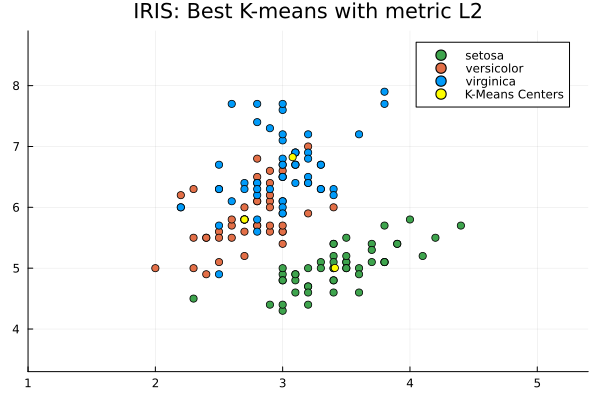

In [27]:
# To plot the IRIS x,y points along with the clusters, for graphing purposes, we need to find an approprate bounding box.
xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

# Plot the IRIS points, followed by the cluster centers in yellow.
plot(xp, yp, seriestype=:scatter, color=sp, group=spec, title="IRIS: Best K-means with metric L2", legend=true, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow", label="K-Means Centers")

In [28]:
savefig(g,"iris_dataset_test.svg")

"/home/rsm/proj/github/Cluster.jl/src/iris_dataset_test.svg"

### Repeat the Above for Different Metrics.

In [29]:
# Notice the way we provide the L1 metric. We use the LP function which has an extra parameter that we need to pass to give us the L1 function; namely "1".
kbest, mp, xc, tv = find_best_cluster(MI, 1:15; dmetric=(x,y;kwargs...) -> LP(x,y,1;kwargs...), verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [153.65066666666664, 103.932661793546, 80.8079287556415, 74.63215171924847, 65.29227916227917, 62.70156610124157, 61.507822959149784, 57.61183004495504, 52.56633366633368, 51.74422310827574, 46.34475774225779, 48.644039201539194, 47.3471284271284, 45.51897692091188, 44.04347187040685]
var_by_k_mod = [153.65066666666664, 146.9829798819688, 139.96343825917714, 149.26430343849694, 145.99797461274926, 153.58684302143266, 162.73440323489928, 162.95086280541838, 157.69900099900104, 163.6296007780688, 153.70817243098753, 168.50789476487617, 183.84423000460475, 182.4818745369884, 181.9516086007899]
rel change of var [-0.045363665847924554, -0.05015268065788168, 0.062311382996887404, -0.022372425606666232, 0.04941092778125786, 0.05621159405526904, 0.0013283732702758571, -0.033303075943078464, 0.03624405212056618, -0.06454717527485947, 0.08782806499683062, 0.08342026964536474, -0.0074657029421308085, -0.002914323980294844]
mono_var_by_mod: [153.65066666666664, 146.9829798819688, 1

(3, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 2, 3, 3, 3, 2, 3, 3, 2], [3.3109090909090915 2.753846153846154 3.0999999999999996; 4.996363636363635 5.903846153846152 6.853488372093022], 80.8079287556415)

In [30]:
xc

2×3 Matrix{Float64}:
 3.31091  2.75385  3.1
 4.99636  5.90385  6.85349

In [31]:
x = xc[1, :]
y = xc[2, :]

3-element Vector{Float64}:
 4.996363636363635
 5.903846153846152
 6.853488372093022

In [32]:
xp = MI[1, :]
yp = MI[2, :];
sp = map(iris[:, :Species]) do spec
      if spec == "virginica"
        1
    elseif spec == "versicolor"
        2
    else
        3
    end
    end;
spec = iris[:, :Species];

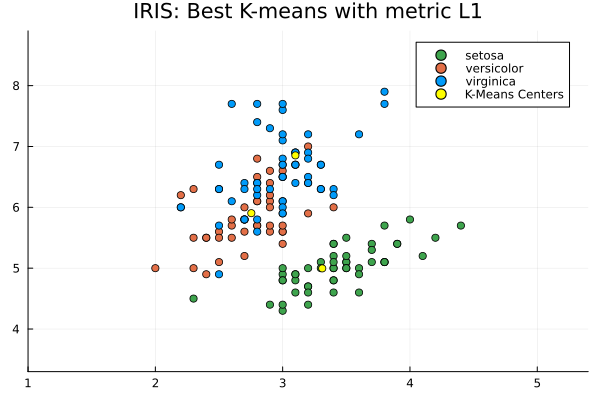

In [33]:

xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)


plot(xp, yp, seriestype=:scatter, color=sp, group=spec, title="IRIS: Best K-means with metric L1", legend=true, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow", label="K-Means Centers")

In [34]:
# Find the best cluster number using the KL (Kullback-Liebler metric) -- a symmetrized version of the Kullback-Liebler divergence.
kbest, mp, xc, tv = find_best_cluster(MI, 1:10; dmetric=KL, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [26.607231804709453, 13.81459680635228, 8.309019010482672, 7.2519097500964715, 6.806647305292653, 5.350888596918821, 4.857023855255587, 4.456758470661503, 4.103788318598167, 3.6410941420097673]
var_by_k_mod = [26.607231804709453, 19.536790162259443, 14.391643087211664, 14.503819500192943, 15.220126073500136, 13.106946732928128, 12.850477232914463, 12.605616546861343, 12.311364955794502, 11.51415066384744]
rel change of var [-0.3619039557536154, -0.35750935760905084, 0.00773426703081812, 0.047063116944501486, -0.16122590437200307, -0.019957974740172232, -0.019424729059689415, -0.023900809709028043, -0.06923778533228557]
mono_var_by_mod: [26.607231804709453, 19.536790162259443, 14.391643087211664, 14.391643087211664, 14.391643087211664, 13.106946732928128, 12.850477232914463, 12.605616546861343, 12.311364955794502, 11.51415066384744]
mono_var_series: [-0.1809519778768077, -0.17875467880452542, 0.0, 0.0, -0.024504111835902218, -0.009978987370086116, -0.009712364529844707, -

(3, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 2, 3, 3, 3, 2, 3, 3, 2], [3.4510204081632656 2.672222222222222 3.089361702127659; 5.016326530612244 5.757407407407408 6.804255319148933], 8.309019010482672)

In [35]:
xc

2×3 Matrix{Float64}:
 3.45102  2.67222  3.08936
 5.01633  5.75741  6.80426

In [36]:
x = xc[1, :]
y = xc[2, :]

3-element Vector{Float64}:
 5.016326530612244
 5.757407407407408
 6.804255319148933

In [37]:
xr,yr,z = raw_confusion_matrix(Symbol.(iris[:, :Species]), mp)

([:setosa, :versicolor, :virginica], [1, 2, 3], [49 1 0; 0 37 13; 0 16 34])

In [38]:
# Get the best map from the centers (represented as integers) to the Species attribute of the IRIS dataset.
cmap = find_cluster_map(Symbol.(iris[:, :Species]), mp)

Dict{Int64, Symbol} with 3 entries:
  2 => :versicolor
  3 => :virginica
  1 => :setosa

In [39]:
xp = MI[1, :]
yp = MI[2, :];

sp = map(iris[:, :Species]) do spec
      if spec == "virginica"
        1
    elseif spec == "versicolor"
        2
    else
        3
    end
    end;
spec = iris[:, :Species];

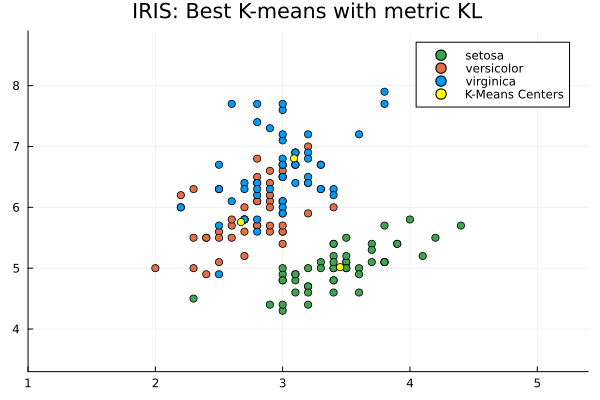

In [40]:
xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color=sp, group=spec, title="IRIS: Best K-means with metric KL", legend=true, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow", label="K-Means Centers")

In [41]:
kbest, mp, xc, tv = find_best_cluster(MI, 1:15; dmetric=CD, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [0.5806129834369813, 0.10575262811580677, 0.05449112421674818, 0.04236238359199285, 0.036313027637008055, 0.025050205860638997, 0.01760351225707857, 0.0216763087966112, 0.02102897354992017, 0.012569928295602883, 0.015183276830992964, 0.013498326086412438, 0.01311492449015006, 0.014448288391099018, 0.01437605837000544]
var_by_k_mod = [0.5806129834369813, 0.14955680093797222, 0.09438139570495468, 0.0847247671839857, 0.08119839826517858, 0.061360222310242275, 0.046574515633507216, 0.06130985976470957, 0.0700965784997339, 0.039749603439103394, 0.054935162548909136, 0.04675957319759741, 0.047286532723074454, 0.05792201248370981, 0.059390116961212595]
rel change of var [-2.8822238761163868, -0.5846004376275717, -0.11397645389805502, -0.043429045327848255, -0.32330678097339466, -0.3174634556177272, 0.24034216009876003, 0.1253516066416521, -0.7634535299735061, 0.2764269441504963, -0.1748431132329455, 0.011143966265471254, 0.18361723470203173, 0.02471967648189003]
mono_var_by_mod

(2, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3.441176470588236 2.8595959595959597; 5.043137254901961 6.255555555555554], 0.10575262811580677)

In [42]:
xc

2×2 Matrix{Float64}:
 3.44118  2.8596
 5.04314  6.25556

In [43]:
x = xc[1, :]
y = xc[2, :]

2-element Vector{Float64}:
 5.043137254901961
 6.255555555555554

In [44]:
tv

0.10575262811580677

In [45]:
xp = MI[1, :]
yp = MI[2, :];
sp = map(iris[:, :Species]) do spec
      if spec == "virginica"
        1
    elseif spec == "versicolor"
        2
    else
        3
    end
    end;
spec = iris[:, :Species];

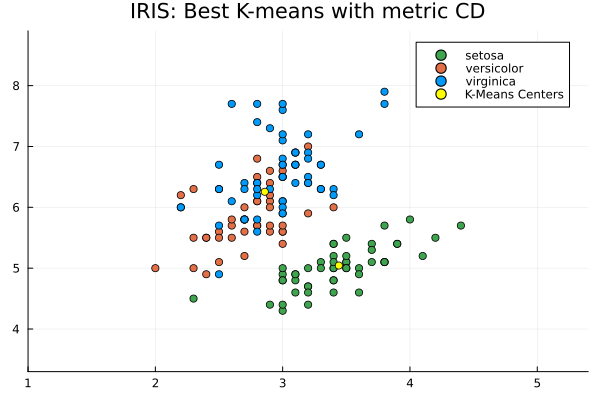

In [46]:
xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color=sp, group=spec, title="IRIS: Best K-means with metric CD", legend=true, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow", label="K-Means Centers")

In [47]:
kbest, mp, xc, tv = find_best_cluster(MI, 1:10; dmetric=JD, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [150.0, 150.0, 150.0, 150.0, 150.0, 149.33333333333331, 150.0, 150.0, 148.0, 148.0]
var_by_k_mod = [150.0, 318.1980515339464, 433.01270189221935, 525.0, 603.7383539249433, 609.6507804260355, 737.0307223679931, 795.495128834866, 789.3333333333334, 842.4307686688564]
rel change of var [0.5285954792089683, 0.2651530771650466, 0.17521390115767743, 0.13041800875008197, 0.009698054510748594, 0.17282853763911074, 0.07349436137026216, -0.007806328760387649, 0.06302884143159147]
mono_var_by_mod: [150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0]
mono_var_series: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


(1, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [3.057333333333334; 5.843333333333335;;], 150.0)

In [48]:
display(xc)

2×1 Matrix{Float64}:
 3.057333333333334
 5.843333333333335

In [49]:
x = xc[1, :]
y = xc[2, :]

1-element Vector{Float64}:
 5.843333333333335

In [50]:
values(mp);

In [51]:
xp = MI[1, :]
yp = MI[2, :];
sp = map(iris[:, :Species]) do spec
      if spec == "virginica"
        1
    elseif spec == "versicolor"
        2
    else
        3
    end
    end;
spec = iris[:, :Species];

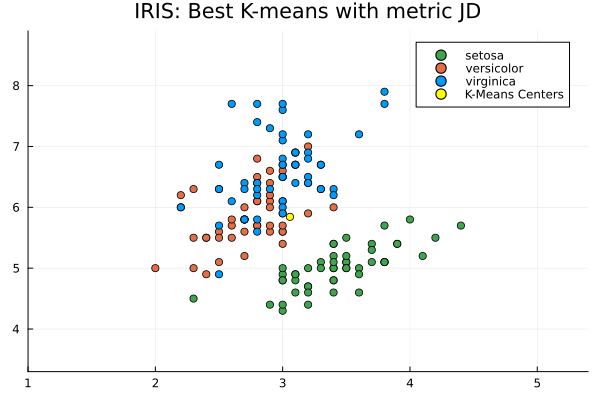

In [52]:
xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color=sp, group=spec, title="IRIS: Best K-means with metric JD", legend=true, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow", label="K-Means Centers")